# MATH 2319 Semester 1, 2020 
# Course Project :: Predicting the Price Range of a Mobile



## <span style="color: #0099cc;">Table of Contents
- [Overview](#1) <br/>
- [Data Retrieving](#2) <br/>
    * [Setup](#3)<br/>
    * [Read/Import Data](#4)<br/>
- [Data Preparation](#5) <br/>
- [Data Exploration and Visualisation](#6)<br/> 
    * [Univariate Visualization](#7)<br/>
    * [Bivariate Visualization](#8)<br/>
    * [Trivariate Visualization](#9)<br/>
- [Predictive Modelling](#10)<br/>
    * [Overview of Methodology](#11)<br/>
    * [One Hot Encoding](#12)<br/>
    * [Scaling of Features](#13)<br/>
    * [Feature Selection &amp; Ranking](#14)<br/>
    * [Train-Test Splitting](#15)<br/>
    * [Model Evaluation Strategy](#16)<br/>
- [Hyperparameter Tuning](#17)<br/>
    * [Model 1 : K-Nearest Neighbors (KNN)](#18)<br/>
    * [Model 2 : Decision Tree](#19)<br/>
    * [Model 3 : Random Forest Classifier](#20)<br/>
    * [Model 4 : (Gaussian) Naive Bayes](#21)<br/>
    * [Model 5 : SVM](#22)<br/>
- [Performance comparison](#23)<br/>
    * [Paired T-Test](#24)<br/>
- [Evaluation Metrics](#25)<br/>
- [Limitations and Proposed Solutions](#26)<br/>
- [Summary and Conclusion](#27)<br/>
- [References](#28)

# <span style="color: #0099cc;"> Overview <a class="anchor" id="1"></a>

### <span style="color: #0099cc;">Objective
This Study aims at accurately predicting in what price range a particular mobile falls into , by fitting the data into five classifiers (K-NearestNeighbour, Decision Tree, Random Forest Classifier, Naive Bayes Classifier, and Support Vector Machine Classifier) and identify the best classifier with highest accuracy.   

### <span style="color: #0099cc;">Dataset Source
The Mobile Price Classification data consists of 2000 observations and  is sourced from the Kaggle [https://www.kaggle.com/iabhishekofficial/mobile-price-classification ] (Sharma, A 2018). These descriptive feature include 6 categorical features and 15 numerical features. 

### <span style="color: #0099cc;"> Dataset Description 
This dataset contains information about many mobiles and variables about it.The numerical variables indicate the battery power , clock speed , front Camera (in mega pixels ) , internal memory , mobile depth in cm , weight of mobile phone , number of cores , primary camera (in mega pixels) , pixel resolution height and width , ram , screen height and width of mobile in cm and talk time. The categorical variables give information whether the mobile has bluetooth , dual sim , 4g and 3g connectivity , touch screen and wifi. 


### <span style="color: #0099cc;">Target Feature
The target feature is __"Price_Range"__, a multinomial feature with levels defined as 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).  


# <span style="color: #0099cc;"> Data Retrieving <a class="anchor" id="2"></a>

## <span style="color: #0099cc;"> Setup: <a class="anchor" id="3"></a>
Importing all the necessary libraries to produce the report.

In [1]:
seed_value = 999 
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
plt.style.use("ggplot")
pd.set_option('display.max_columns', None) 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#!pip install --upgrade altair
#!pip install vega vega_datasets

## <span style="color: #0099cc;"> Read/Import Data: <a class="anchor" id="4"></a>
* The Dataset, **'train.csv'** is read in the form of pandas dataframe using <code>read_csv</code> function.  
* The shape of the dataframe can be obtained using <code>shape</code> function.
* The <code>sample</code> function is used to display **'n'** rows of the dataframe based on <code>ramdom_state</code> option.
* The <code>dtypes</code> function is made use to understand the datatype of the columns in the dataframe.

In [3]:
mobile_df = pd.read_csv('mobile_Data.csv')

In [4]:
mobile_df.shape

(2000, 21)

In [5]:
mobile_df.sample(n = 5 , random_state=999)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1015,1371,0,0.5,0,4,0,52,0.5,167,4,19,471,663,3034,13,6,8,0,0,0,2
1990,1617,1,2.4,0,8,1,36,0.8,85,1,9,743,1426,296,5,3,7,1,0,0,0
672,1979,1,1.6,1,0,0,32,0.2,165,7,1,833,1630,452,13,6,14,0,1,0,0
624,1919,0,1.5,0,5,1,48,0.8,150,4,6,304,1191,1391,19,13,12,1,0,1,1
1497,1375,0,2.9,0,2,0,20,0.4,147,6,7,596,679,3847,8,0,12,1,0,1,3


# <span style="color: #0099cc;"> Data Preparation <a class="anchor" id="5"></a>

The Detailed understanding of the dataset can be obtained from the following functions:
* The <code>dtypes</code> function is made use to understand the datatype of the columns in the dataframe.
* The <code>value_counts()</code> and <code>np.unique</code> functions is used to obtain the information on the values in the columns.

In [6]:
mobile_df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

## <span style="color: #0099cc;"> Fixing Column Names

The features are renamed to increase the readability. This is done using <code>rename</code> function.

In [9]:
mobile_df = mobile_df.rename(columns={'battery_power': 'BatteryPower', 'blue':'BlueTooth', 'clock_speed':'ClockSpeed', 'dual_sim':'DualSim', 'fc':'FrontCamera', 'four_g':'4G',
       'int_memory':'InternalMemory', 'm_dep':'MobileDepth', 'mobile_wt':'MobileWeight', 'n_cores':'NumberOfCores', 'pc':'PrimaryCamera', 'px_height':'PixelHeight',
       'px_width':'PixelWidth', 'ram':'RAMSize', 'sc_h':'ScreenHeight', 'sc_w':'ScreenWidth', 'talk_time':'TalkTime', 'three_g':'3G',
       'touch_screen':'TouchScreen', 'wifi':'WIFI', 'price_range':'Price_Range'})
mobile_df.columns

Index(['BatteryPower', 'BlueTooth', 'ClockSpeed', 'DualSim', 'FrontCamera',
       '4G', 'InternalMemory', 'MobileDepth', 'MobileWeight', 'NumberOfCores',
       'PrimaryCamera', 'PixelHeight', 'PixelWidth', 'RAMSize', 'ScreenHeight',
       'ScreenWidth', 'TalkTime', '3G', 'TouchScreen', 'WIFI', 'Price_Range'],
      dtype='object')

## <span style="color: #0099cc;"> Removing Constant Features

The columns with constant features are not informative. These columns are removed using <code>nunique()</code> function.

In [10]:
mobile_df = mobile_df.loc[:,mobile_df.nunique() != 1]
mobile_df.shape

(2000, 21)

## <span style="color: #0099cc;"> Checking Datatypes of Features

Ensuring correct datatype for the features using <code>astype()</code> function. The features <code>BlueTooth</code>, <code>DualSim</code>, <code>4G</code> , <code>3G</code> , <code>TouchScreen</code>, <code>WIFI</code> are converted to <code>Object</code> type as 
* __"1"__ if available 
* __"0"__ if not.

In [11]:
object_cols = ['BlueTooth', 'DualSim' , '4G' , '3G' , 'TouchScreen', 'WIFI' ]
for col in object_cols:
    mobile_df[col] = mobile_df[col].astype(object)
mobile_df.dtypes

BatteryPower        int64
BlueTooth          object
ClockSpeed        float64
DualSim            object
FrontCamera         int64
4G                 object
InternalMemory      int64
MobileDepth       float64
MobileWeight        int64
NumberOfCores       int64
PrimaryCamera       int64
PixelHeight         int64
PixelWidth          int64
RAMSize             int64
ScreenHeight        int64
ScreenWidth         int64
TalkTime            int64
3G                 object
TouchScreen        object
WIFI               object
Price_Range         int64
dtype: object

## <span style="color:#0099cc">Checking for Missing Values

The <code>isna().sum()</code> provides the count of missing values. There are no missing values in the dataset.

In [12]:
mobile_df.isna().sum()

BatteryPower      0
BlueTooth         0
ClockSpeed        0
DualSim           0
FrontCamera       0
4G                0
InternalMemory    0
MobileDepth       0
MobileWeight      0
NumberOfCores     0
PrimaryCamera     0
PixelHeight       0
PixelWidth        0
RAMSize           0
ScreenHeight      0
ScreenWidth       0
TalkTime          0
3G                0
TouchScreen       0
WIFI              0
Price_Range       0
dtype: int64

## <span style="color: #0099cc;"> Descriptive Statistics

Descriptive statistics of each feature is a good way to understand its quirks. This is done using <code>describe</code> function.

In [13]:
mobile_df.describe(include = np.number).round(3)

,BatteryPower,ClockSpeed,FrontCamera,InternalMemory,MobileDepth,MobileWeight,NumberOfCores,PrimaryCamera,PixelHeight,PixelWidth,RAMSize,ScreenHeight,ScreenWidth,TalkTime,Price_Range
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,1238.518,1.522,4.310,32.046,0.502,140.249,4.520,9.916,645.108,1251.516,2124.213,12.306,5.767,11.011,1.500
std,439.418,0.816,4.341,18.146,0.288,35.400,2.288,6.064,443.781,432.199,1084.732,4.213,4.356,5.464,1.118
min,501.000,0.500,0.000,2.000,0.100,80.000,1.000,0.000,0.000,500.000,256.000,5.000,0.000,2.000,0.000
25%,851.750,0.700,1.000,16.000,0.200,109.000,3.000,5.000,282.750,874.750,1207.500,9.000,2.000,6.000,0.750
50%,1226.000,1.500,3.000,32.000,0.500,141.000,4.000,10.000,564.000,1247.000,2146.500,12.000,5.000,11.000,1.500
75%,1615.250,2.200,7.000,48.000,0.800,170.000,7.000,15.000,947.250,1633.000,3064.500,16.000,9.000,16.000,2.250
max,1998.000,3.000,19.000,64.000,1.000,200.000,8.000,20.000,1960.000,1998.000,3998.000,19.000,18.000,20.000,3.000


In [14]:
mobile_df.describe(include = np.object)

,BlueTooth,DualSim,4G,3G,TouchScreen,WIFI
count,2000,2000,2000,2000,2000,2000
unique,2,2,2,2,2,2
top,0,1,1,1,1,1
freq,1010,1019,1043,1523,1006,1014


## <span style="color: #0099cc;"> Checking for Outliers

Outliers are unusual values in the dataset, and they can distort further analysis. These should be either removed of imputed with mean/mode value. Here, Since the number of outliers are very small, outliers are removed. This is achieved by plotting boxplot and then the outliers are removed using __'TUKEY's'__ method.

Boxplots are plotted using <code>boxplot</code> function of <code>matplotlib</code> library.

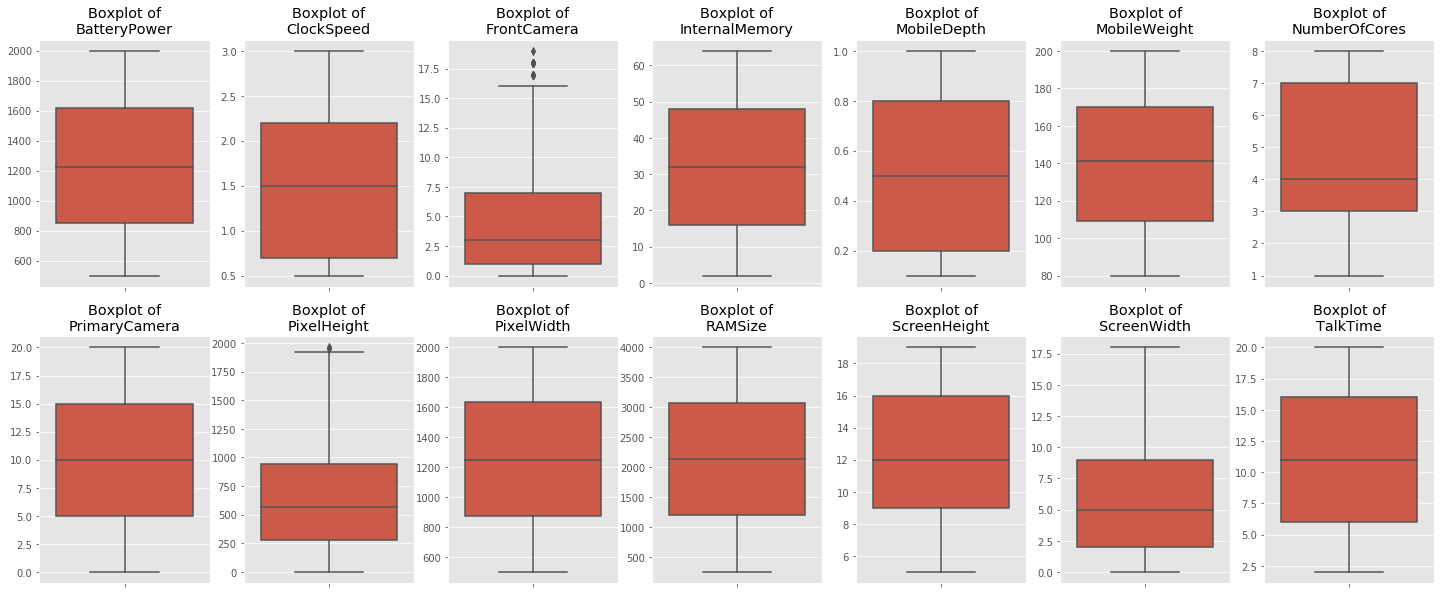

In [15]:
num_cols = mobile_df.select_dtypes(include=['float64' , 'int64']).columns.tolist()[:-1]
fig = plt.figure(figsize=[25,10])
for col,num in zip(num_cols, range(1,15)):
    ax = fig.add_subplot(2,7,num)
    sns.boxplot(mobile_df[col], orient='v')
    ax.set_title("Boxplot of\n" +col)
    ax.set_ylabel('')
plt.show()

Features <code>PixelHeight</code> and <code>FrontCamera</code> has a total of __2__   and __18__ observations as __Outliers__ respectively. These 20 observations are removed as the outliers present in the dataset are less than 5% of total number of observations.

In [16]:
Q1 = mobile_df['PixelHeight'].quantile(0.25)
Q3 = mobile_df['PixelHeight'].quantile(0.75)
IQR = Q3 - Q1
all_cols = mobile_df.columns
idx = mobile_df[((mobile_df['PixelHeight'] < (Q1 - 1.5 * IQR)) | (mobile_df['PixelHeight'] > (Q3 + 1.5 * IQR)))] [all_cols].index
mobile_df = mobile_df.drop(mobile_df.index[idx])
mobile_df.shape

(1998, 21)

In [17]:
Q1 = mobile_df['FrontCamera'].quantile(0.25)
Q3 = mobile_df['FrontCamera'].quantile(0.75)
IQR = Q3 - Q1
all_cols = mobile_df.columns
idx = mobile_df[((mobile_df['FrontCamera'] < (Q1 - 1.5 * IQR)) | (mobile_df['FrontCamera'] > (Q3 + 1.5 * IQR)))] [all_cols].index
mobile_df = mobile_df.drop(mobile_df.index[idx])
mobile_df.shape

(1980, 21)

## <span style="color: #0099cc;"> Dependent Variable

We need to make sure the levels of the <code>Price_Range</code> categorical feature, which is our __"Target"__ feature.

In [18]:
mobile_df['Price_Range'].value_counts()

0    498
2    497
1    494
3    491
Name: Price_Range, dtype: int64

# <span style="color: #0099cc;"> Data Exploration and Visualization <a class="anchor" id="6"></a>

Our dataset can now be considered __"clean"__ and __"ready"__ for visualisation and statistical modeling.

## <span style="color: #0099cc;"> Univariate Visualization <a class="anchor" id="7"></a>

__1. Bar Chart of <code>DualSim</code>__: 
* From Figure 1, it is clear that there is no significance difference in the number of dual sim and non dual sim mobile phones.

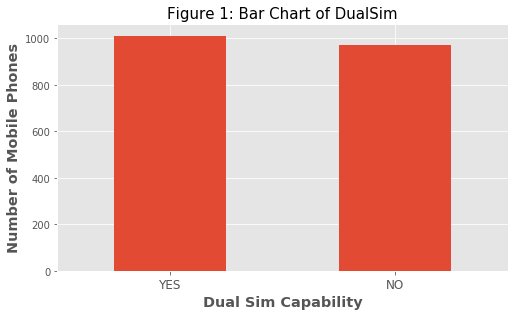

In [19]:
plt.figure(figsize=[7,4])
YesNoLabels = ['YES','NO']
PriceLabels = ['Low Cost','Medium Cost','High Cost','Very High Cost']
RelPriceLabels = [' ','Low Cost','Medium Cost','High Cost','Very High Cost']
graph = mobile_df['DualSim'].value_counts().plot(kind = 'bar')
graph.set_xticklabels(YesNoLabels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.title('Figure 1: Bar Chart of DualSim', fontsize = 15)
plt.xlabel('Dual Sim Capability', fontsize='x-large',fontweight='bold')
plt.ylabel('Number of Mobile Phones', fontsize='x-large',fontweight='bold')
plt.show()

__2. Histogram of <code>FrontCamera</code>__ : 
* The distribution in Figure 2 is right skewed. This shows a lot of mobile phones are built with front cameras with less MegaPixels.

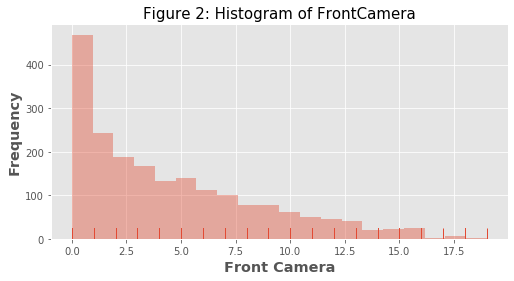

In [20]:
plt.figure(figsize=[7,4])
graph = sns.distplot(mobile_df['FrontCamera'], kde=False, rug=True).set_title('Figure 2: Histogram of FrontCamera', fontsize = 15)
plt.tight_layout()
plt.xlabel('Front Camera', fontsize='x-large',fontweight='bold')
plt.ylabel('Frequency', fontsize='x-large',fontweight='bold')
plt.show();

__3. Bar Chart of <code>4G</code>__ : 
* From Figure 3, a little more than half of the mobile phones are 4G capable.

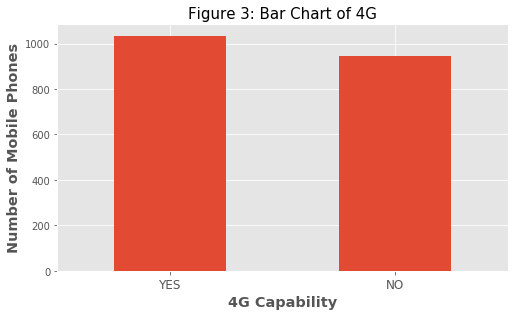

In [21]:
plt.figure(figsize=[7,4])
graph = mobile_df['4G'].value_counts().plot(kind = 'bar')
graph.set_xticklabels(YesNoLabels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.title('Figure 3: Bar Chart of 4G', fontsize = 15)
plt.xlabel('4G Capability', fontsize='x-large',fontweight='bold')
plt.ylabel('Number of Mobile Phones', fontsize='x-large',fontweight='bold')
plt.show();

__4. Box Plot of <code>ClockSpeed</code>__ : 
* The boxplot indicated that ClockSpeed of the mobiles followed a symmetric distribution.

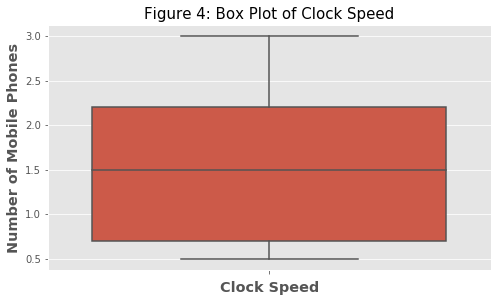

In [22]:
plt.figure(figsize=[7,4])
graph = sns.boxplot(mobile_df['ClockSpeed'], orient="vert")
plt.title('Figure 4: Box Plot of Clock Speed', fontsize = 15)
plt.tight_layout()
plt.xlabel('Clock Speed', fontsize='x-large',fontweight='bold')
plt.ylabel('Number of Mobile Phones', fontsize='x-large',fontweight='bold')
plt.show();

__5. Histogram of <code>ScreenWidth</code>__ : 
* Figure 5 distribution is again right skewed, with a major number of mobile phones under 2.5 CMs screen width.

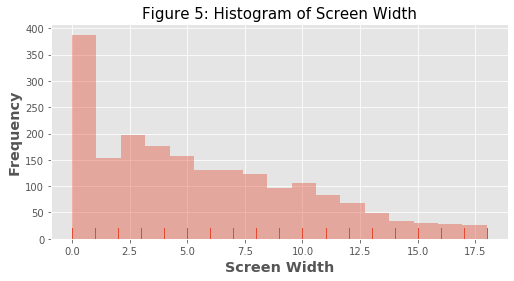

In [23]:
plt.figure(figsize=[7,4])
graph = sns.distplot(mobile_df['ScreenWidth'], kde=False, rug=True).set_title('Figure 5: Histogram of Screen Width', fontsize = 15)
plt.tight_layout()
plt.xlabel('Screen Width', fontsize='x-large',fontweight='bold')
plt.ylabel('Frequency', fontsize='x-large',fontweight='bold')
plt.show();

## <span style="color:#0099cc"> Bivariate Visualization <a class="anchor" id="8"></a>

__6. Bar Plot of average<code>BatteryPower</code> by <code>Price_Range</code>__ : 
* Figure 6 depicts that as the price range increases the mean battery power raises.

<Figure size 504x216 with 0 Axes>

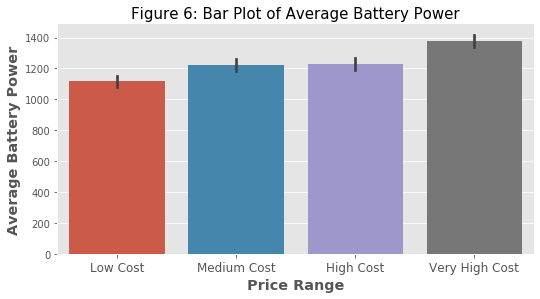

In [24]:
plt.figure(figsize=[7,3])
graph = sns.catplot(x= 'Price_Range', y='BatteryPower', data = mobile_df, kind = "bar", height=4,aspect=1.9)
graph.set_xticklabels(PriceLabels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.title('Figure 6: Bar Plot of Average Battery Power', fontsize = 15)
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Average Battery Power',fontsize='x-large',fontweight='bold')
plt.show();

__7. Box Plot of <code>MobileWeight</code> by <code>Price_Range</code>__ : 
* The distribution of weight of mobile phones are similarly distributed among the different price range.

<Figure size 1008x432 with 0 Axes>

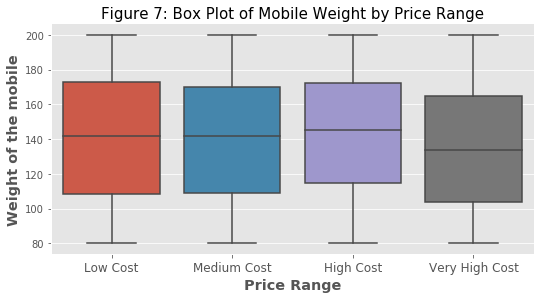

In [25]:
plt.figure(figsize=(14,6))
graph = sns.catplot(x = 'Price_Range', y='MobileWeight', data = mobile_df, kind="box", height=4,aspect=1.9)
graph.set_xticklabels(PriceLabels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.title('Figure 7: Box Plot of Mobile Weight by Price Range', fontsize = 15)
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Weight of the mobile',fontsize='x-large',fontweight='bold')
plt.show();

__8. Box Plot of <code>RAMSize</code> by <code>Price Range</code>__ : 
* Figure 8 shows clearly that higher priced mobile phones have higher RAM sizes.

<Figure size 1008x432 with 0 Axes>

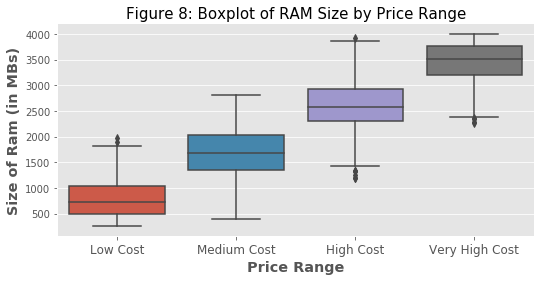

In [26]:
plt.figure(figsize=[14,6])
graph = sns.catplot(x= 'Price_Range', y = 'RAMSize', data = mobile_df, kind = "box", height=4,aspect=1.9)
graph.set_xticklabels(PriceLabels, rotation = 0, fontsize='large')
plt.title('Figure 8: Boxplot of RAM Size by Price Range', fontsize = 15)
plt.tight_layout()
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Size of Ram (in MBs)',fontsize='x-large',fontweight='bold')
plt.show();

__9. Point Plot of <code>Average TalkTime</code> by <code>Price Range</code>__ : 
* The Average Talktime of the medium cost mobile phones is higher than rest of the other priced mobile phones.

<Figure size 1008x432 with 0 Axes>

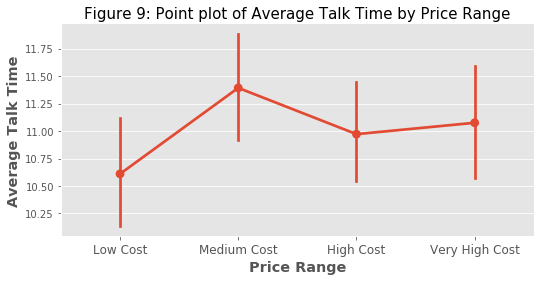

In [27]:
plt.figure(figsize=(14,6))
graph = sns.catplot(x="Price_Range", y="TalkTime", kind="point", data=mobile_df, height=4,aspect=1.9)
labels = ['Low Cost','Medium Cost','High Cost','Very High Cost']
plt.title('Figure 9: Point plot of Average Talk Time by Price Range', fontsize = 15)
graph.set_xticklabels(labels, rotation = 0, fontsize='large')
plt.tight_layout()
plt.xlabel('Price Range',fontsize='x-large',fontweight='bold')
plt.ylabel('Average Talk Time',fontsize='x-large',fontweight='bold')
plt.show();

__10. Bar Plot of <code>3G phones</code> and <code>4G phones</code>__ : 
* Irrespective of the mobile price ranges, the 3/4th proportion of mobile phones do not support 3G.

<Figure size 1008x432 with 0 Axes>

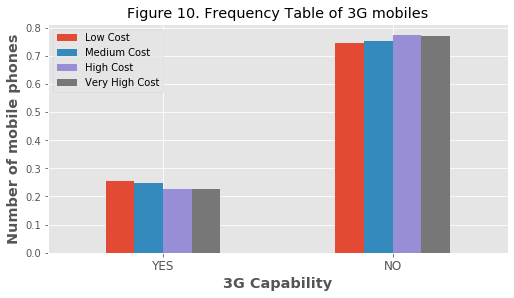

In [28]:
plt.figure(figsize=(14,6))
graph = pd.crosstab(mobile_df['3G'],mobile_df['Price_Range'], normalize="columns").plot(kind="bar", figsize=[7,4])
graph.set_xticklabels(YesNoLabels, rotation = 0, fontsize='large')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('3G Capability', fontsize='x-large',fontweight='bold')
plt.ylabel('Number of mobile phones', fontsize='x-large',fontweight='bold')
plt.title("Figure 10. Frequency Table of 3G mobiles", fontsize='x-large',fontweight='normal')

plt.legend(title = "Price_Range")
plt.legend(PriceLabels)
plt.show()

## <span style="color:#0099cc">Trivariate Visualization <a class="anchor" id="9"></a>

__11. Box Plot of <code>Clock Speed</code> by <code>Blue Tooth</code> for all the <code>Price_Range</code>__
* When Clock Speed was plotted against Bluetooth capability for various price ranges showed symmetry.

<Figure size 1008x432 with 0 Axes>

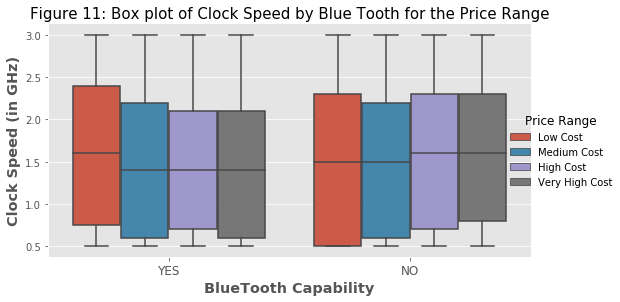

In [29]:
plt.figure(figsize=(14,6))
graph = sns.catplot(x="BlueTooth", y="ClockSpeed", hue="Price_Range", kind="box", data=mobile_df,  height=4,aspect=1.9, legend_out = True)
graph.set_xticklabels(YesNoLabels, rotation = 0, fontsize='large')
plt.title('Figure 11: Box plot of Clock Speed by Blue Tooth for the Price Range', fontsize = 15)
plt.xlabel('BlueTooth Capability',fontsize='x-large',fontweight='bold')
plt.ylabel('Clock Speed (in GHz)',fontsize='x-large',fontweight='bold')
Legendtitle = 'Price Range'
graph._legend.set_title(Legendtitle)
for t, l in zip(graph._legend.texts, PriceLabels): t.set_text(l)
plt.show()

__12. Box Plot of <code>Internal Memory</code> by <code>WIFI</code> for all the <code>Price Range</code>__
* For Low Cost price range without WIFI capability the average internal memory was higher compared to the median.
* Other Boxplots showed near to symmetric distribution.

<Figure size 1008x432 with 0 Axes>

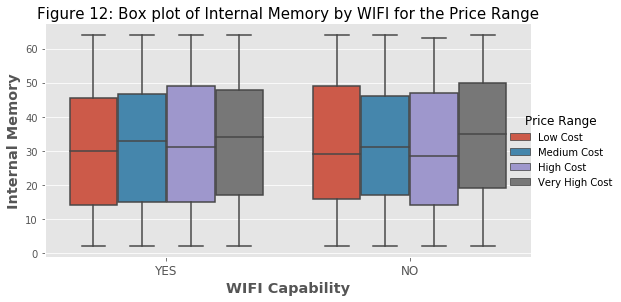

In [30]:
plt.figure(figsize=(14,6))
graph = sns.catplot(x="WIFI", y="InternalMemory", hue="Price_Range", kind="box", data=mobile_df,
                    height=4,aspect=1.9, legend_out=True)
graph.set_xticklabels(YesNoLabels, rotation = 0, fontsize='large')
plt.title('Figure 12: Box plot of Internal Memory by WIFI for the Price Range', fontsize = 15)
plt.xlabel('WIFI Capability',fontsize='x-large',fontweight='bold')
plt.ylabel('Internal Memory',fontsize='x-large',fontweight='bold')
Legendtitle = 'Price Range'
graph._legend.set_title(Legendtitle)
for t, l in zip(graph._legend.texts, PriceLabels): t.set_text(l)
plt.show()

__13. Scatter Plot of <code>Screen Height and Width</code> for all the <code>Price Range</code>__ : 
* From Figure 13 it can be inferred that there is not much of correlation between pixel height and width for low , medium and high cost.
* But for most of the Very High Cost price range mobiles, Pixel width and height of the mobile phones were higher. 

<Figure size 1008x432 with 0 Axes>

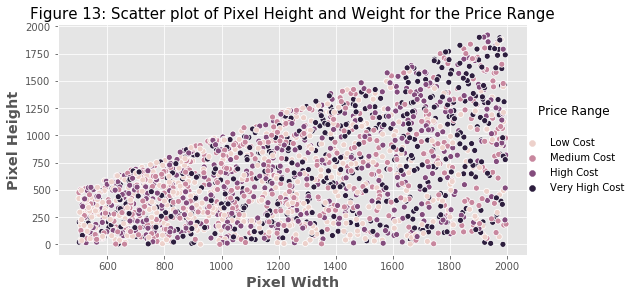

In [31]:
plt.figure(figsize=[14,6])
graph = sns.relplot(x="PixelWidth", y="PixelHeight", hue="Price_Range", data=mobile_df,  
                    height=4,aspect=1.9, legend='brief')
plt.title('Figure 13: Scatter plot of Pixel Height and Weight for the Price Range', fontsize = 15)
plt.xlabel('Pixel Width',fontsize='x-large',fontweight='bold')
plt.ylabel('Pixel Height',fontsize='x-large',fontweight='bold')
Legendtitle = 'Price Range'
graph._legend.set_title(Legendtitle)
for t, l in zip(graph._legend.texts, RelPriceLabels): t.set_text(l)
plt.show()

__14. Box Plot of <code>Mobile Weight</code> of <code>4G</code> mobiles for all the <code>Price Range</code>__
* The higher priced mobiles with 4G capability has mobile weight. On the other hand, lower priced mobiles without 4G capability tend to have more weight.

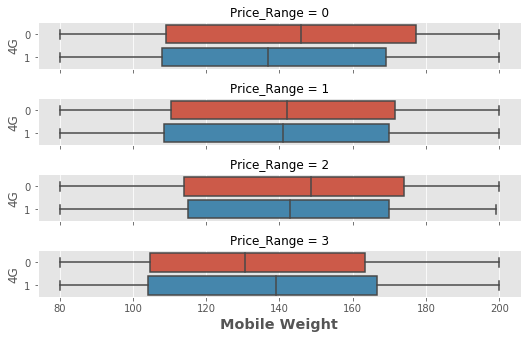

In [32]:
from IPython.display import display, HTML
display(HTML('Figure 14: Box Plot of Mobile Weight of 4G mobiles for all the Price Range'))
g = sns.catplot(x="MobileWeight", y="4G", row="Price_Range", kind="box", orient="h", 
                height=1.2, aspect=6.2, data=mobile_df)
plt.xlabel('Mobile Weight',fontsize='x-large',fontweight='bold')
plt.show()

## <span style="color:#0099cc">Descriptive Features and the Target Feature 

In [33]:
Data = mobile_df.drop(columns='Price_Range')
target = mobile_df['Price_Range']
target.value_counts()

0    498
2    497
1    494
3    491
Name: Price_Range, dtype: int64

# <span style="color: #0099cc;"> Predictive Modelling <a class="anchor" id="10"></a>
## <span style="color: #0099cc;"> Overview of Methodology <a class="anchor" id="11"></a>
The following classifiers are used to predict multi-nominal target feature( __Price_Range__):<br/>
Model 1: K-Nearest Neighbors (KNN)<br/>
Model 2: Decision trees (DT)<br/>
Model 3: Random Forest (RF)<br/>
Model 4: Gaussian Naive Bayes<br/>
Model 5: Support Vector Machine (SVM)<br/>

In the data preparation stage, the outliers are handled by deleting as these outliers constitute only 1% of the data observations. Modeling strategy begins by encoding the categorical descriptive features as numerical and then scaling these descriptive features using Min-Max Scaler. For model training and testing, the data set is split into 70:30 ratio respectively. This way, training data has 1386 rows used for the hyperparameter tuning phase and test data has 594 rows of data used for performance comparison among the above-mentioned classifiers. Before fitting a classifier on the training data, the best features are selected using the Random Forest Importance method inside a pipeline.

A grid search is performed for 4,5,10,15 and the full set of features (with 20 features) over each classifier. For each model, 5-fold stratified cross-validation evaluation method is applied on the training data using accuracy metric, since the multinomial target feature class counts are balanced and the aim is to accurately estimate the price range of mobiles(0: low cost, 1: medium cost, 2: high cost and 3: very high cost)

The best set of hyperparameters is determined for each model using the training data called tuned classifiers. These tuned classifiers are fit on the test data using 10 fold Stratified cross-validation with 10 repetitions. To find whether the performance difference is statistically significant, paired t-tests are performed. Further, each classifier is compared with respect to corresponding micro scores and confusion matrices on test data to find the appropriate model for the data set.

# <span style="color:#0099cc"> One Hot Encoding <a class="anchor" id="12"></a>

In [34]:
for col in object_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
Data_encoded = pd.get_dummies(Data)

In [35]:
Data_encoded.shape

(1980, 20)

In [36]:
Data_encoded.columns

Index(['BatteryPower', 'BlueTooth', 'ClockSpeed', 'DualSim', 'FrontCamera',
       '4G', 'InternalMemory', 'MobileDepth', 'MobileWeight', 'NumberOfCores',
       'PrimaryCamera', 'PixelHeight', 'PixelWidth', 'RAMSize', 'ScreenHeight',
       'ScreenWidth', 'TalkTime', '3G', 'TouchScreen', 'WIFI'],
      dtype='object')

# <span style="color:#0099cc"> Scaling of Features <a class="anchor" id="13"></a>

A copy of the encoded data is assigned to a variable `Data_unscaled` to keep track of column names. To scale the descriptive features of `Data_unscaled` data frame a min-max scaling is performed using the `MinMaxScaler` method, so that each descriptive feature is scaled to be between 0 and 1.<br/>
Min-max scaling for a numerical feature is done as follows:

 \begin{equation*}Scaled  Value =\frac{Value - min Value}{max Value - min Value}\end{equation*}

In [37]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
Data_unscaled = Data_encoded.copy()
Data_Scaler = preprocessing.MinMaxScaler()
Data_Scaler.fit(Data_unscaled)
Data_scaled = Data_Scaler.transform(Data_unscaled)
Data_scaled.shape

(1980, 20)

The 5 Observations of scaled data is displayed to make sure data is scaled, as all the column names are lost since the scaled data is Numpy array, Column names are retrieved by the copy of the data kept for this purpose.

In [38]:
pd.DataFrame(Data_scaled, columns=Data_unscaled.columns).sample(5, random_state=999)

,BatteryPower,BlueTooth,ClockSpeed,DualSim,FrontCamera,4G,InternalMemory,MobileDepth,MobileWeight,NumberOfCores,PrimaryCamera,PixelHeight,PixelWidth,RAMSize,ScreenHeight,ScreenWidth,TalkTime,3G,TouchScreen,WIFI
701,0.760855,1.0,0.08,0.0,0.526316,1.0,0.306452,0.777778,0.741667,0.857143,0.70,0.306771,0.534713,0.021646,0.785714,0.166667,0.166667,1.0,1.0,0.0
1919,0.726119,1.0,0.80,0.0,0.631579,1.0,0.032258,0.222222,0.566667,0.571429,1.00,0.076042,0.214953,0.601283,0.000000,0.166667,0.500000,1.0,0.0,0.0
1008,0.480962,0.0,0.00,0.0,0.052632,1.0,0.419355,0.444444,0.491667,0.000000,0.35,0.986979,0.985314,0.583111,0.571429,0.611111,0.444444,1.0,1.0,1.0
1968,0.698731,1.0,0.96,0.0,0.105263,0.0,0.887097,0.333333,0.283333,0.000000,0.15,0.180729,0.305073,0.364511,0.285714,0.111111,0.944444,0.0,1.0,1.0
858,0.776887,1.0,0.96,1.0,0.473684,1.0,0.209677,0.444444,0.808333,0.857143,0.95,0.613542,0.953939,0.457509,0.500000,0.388889,0.388889,1.0,0.0,0.0


# <span style="color:#0099cc"> Feature Selection & Ranking <a class="anchor" id="14"></a>

* Using Random Forest Importance(RFI) the most important 10 features are selected in the full dataset.
* During the hyperparameter tuning phase , RFI is included as part of pipeline and searched over 4, 5, 10, 15 and full set of 20 features to determine which number of features works best with each classifer.

In [39]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data_scaled, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_encoded.columns[fs_indices_rfi].values
best_features_rfi

array(['RAMSize', 'BatteryPower', 'PixelHeight', 'PixelWidth',
       'MobileWeight', 'InternalMemory', 'TalkTime', 'PrimaryCamera',
       'ScreenWidth', 'ClockSpeed'], dtype=object)

In [40]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.49033395, 0.07249702, 0.0570832 , 0.05673989, 0.03741151,
       0.0364272 , 0.03088304, 0.02831685, 0.0270602 , 0.02650081])

In [41]:
%config InlineBackend.figure_format = 'retina'
import altair as alt
def plot_imp(best_features, scores, method_name, color):    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})    
    chart = alt.Chart(df,width=500,title=method_name + ' Feature Importances').mark_bar(opacity=0.85,
                                                                                        color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance'))
    return chart

In [42]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', '#D92027').properties(width=400,height=150)

alt.Chart(...)

From the above bar chart it can be inferred that <code>ram</code> feature has nearly 50 percent importance when compared to the remaining  top 9 features.

# <span style="color:#0099cc"> Train-Test Splitting <a class="anchor" id="15"></a>

Following <b>Golden Rule of Model Evaluation</b>, The data used to evaluate a model must be different from the data used to train it.
The scaled dataset has 1980 observations and 20 columns which is divided into train and test partitions with a 70:30 ratio using stratification on target variable. Shape of trained data and test data is found using `shape` method.

In [43]:
D_train, D_test, t_train, t_test = train_test_split(Data_scaled,target,test_size = 0.3, 
                                                    random_state=999,
                                                    stratify = target)

In [44]:
D_train.shape

(1386, 20)

In [45]:
t_train.shape

(1386,)

In [46]:
D_test.shape

(594, 20)

In [47]:
t_test.shape

(594,)

# <span style="color:#0099cc">Model Evaluation Strategy <a class="anchor" id="16"></a>

* Training and tuning the models on 1386 rows of training data and on 594 rows of test data.<br/>
* For each model, 5-fold stratified K fold cross-validation evaluation method is applied on the training data.

In [48]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv_method = StratifiedKFold(n_splits=5, random_state=999)

# <span style="color:#0099cc">Hyperparameter Tuning <a class="anchor" id="17"></a>

* For the hyperparameter tuning phase, `RFIFeatureSelector(RFI)` is used as part of the pipeline to find out the optimal descriptive features from  **4** to the full set of **20** features. 
* RFI is used to determines number of features works best with each classifier.

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None
    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self     
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

Using Pipeline, feature selection and grid search are stacked for all the six classifiers -<br/> 
    
    1)k-nearest neighbors algorithm (k-NN)  
    2)Decision Tree (DT) 
    3)Random Forest (RF)
    4)Gaussian Naive Bayes
    5)Support Vector Machine (SVM)
For all the classifiers the hyperparameter tuning is performed via cross-validation.
* The target feature is multi-nominal with 4 different levels (0, 1, 2, 3) of price range.
* The value of 0 refers low cost, 1 refers medium cost, 2 refers high cost and 3 refers very high cost.
* Scoring metric used is <code>accuracy</code> as the aim is to accurately estimate the price range of mobiles indicating how high is the price and the class counts are balanced.



# <span style="color:#0099cc"> Model 1 : K-Nearest Neighbors (KNN)</span> <a class="anchor" id="18"></a>

* The KNN model is fit and it's hyperparameters are optimised using the grid search.
* A grid search is performed for *number of features* - <code>4,5,10,15</code> and <code>20</code> over the following KNN hyperparameters: 
    * **Number of neighbors** - <code>5,10,15,20,25,30,35,37,40</code>
    * **Distance metric (p)** - <code>1,2,5</code> 
<br/>

* As the square root of the total number of observations(1386) is **37.2** in the trained data set.In order to check the trend over this number the n_neighbors maximum value is set to 40. 

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
pipe_KNN = Pipeline([('fselector', RFIFeatureSelector()), 
                     ('knn', KNeighborsClassifier())])
params_pipe_KNN = {'fselector__n_features_': [4,5,10,15,D_train.shape[1]],
                   'knn__n_neighbors': [5,35,37,40],
                   'knn__p': [1,2,5]}
gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN,param_grid=params_pipe_KNN,cv=cv_method,n_jobs = -1,
                           scoring='accuracy',verbose=1) 

In [51]:
gs_pipe_KNN.fit(D_train, t_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   19.0s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
gs_pipe_KNN.best_params_

{'fselector__n_features_': 4, 'knn__n_neighbors': 35, 'knn__p': 1}

The best performing parameter combination are found using `best_params_`. It is found that the best features are:
  * **Number of features** &nbsp;  <code>4</code>
  * **Number of neighbors** &nbsp;<code>35</code>
  * **Distance metric** &nbsp;<code>1</code> which is Manhattan distance

The best score for the KNN Model is found using `best_score_`.

In [53]:
gs_pipe_KNN.best_score_

0.9134199134199135

* We can infer that the optimal KNN model has a <b>accuracy</b> score of 0.9134.This optimal value is obtained with 4 features and 35 nearest neighbours and p = 1, which is Manhattan distance.Just to be sure to have a look at the other combinations to see if the difference is rather significant or not with respect to best values. For this purpose `get_search_results` method is used to format the grid search outputs as a Pandas data frame.

In [54]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):
    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})
    models = []
    scores = []
    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))
    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))
    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)
    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]
    return pipe_results[columns]

In [55]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head().round(3)

,mean_score,std_score,max_score,min_score,fselector__n_features_,knn__n_neighbors,knn__p
3,0.913,0.011,0.924,0.896,4.0,35.0,1.0
6,0.910,0.007,0.920,0.900,4.0,37.0,1.0
9,0.903,0.017,0.920,0.875,4.0,40.0,1.0
7,0.903,0.017,0.935,0.885,4.0,37.0,2.0
10,0.900,0.014,0.924,0.884,4.0,40.0,2.0


From the above output we can infer that the difference in mean_score is not significant between the hyperparameter combinations. Comparing the remaining combination a visualization of the results of the grid search corresponding to 4 features.

**Visualizing the results of the grid search corresponding to 4 selected features for KNN Model**

In [56]:
results_KNN_F4 = results_KNN[results_KNN['fselector__n_features_'] == 4.0]
alt.Chart(results_KNN_F4,title='KNN Performance Comparison with 10 Features').mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p'))

alt.Chart(...)

# <span style="color:#0099cc"> Model 2 : Decision Tree <a class="anchor" id="19"></a>

* The decision tree model is fit and its hyperparameters are optimised using the grid search.   


* A grid search is performed for *number of features* - <code>4,5,10,15</code> and <code>20</code> over the following Decision Tree hyperparameters: 
    * **split criterion** - <code>Entropy , Gini</code>
    * **maximum depth** - <code>1, 2, 3, 4, 5, 10, 15</code>
    * **minimum samples split** - <code>2, 3, 5, 10</code>  
    
    
* Determining the optimal combination of Number of Features , split criterion(criterion) maximum depth (max_depth) and minimum samples split (min_samples_split).



In [57]:
from sklearn.tree import DecisionTreeClassifier
pipe_DT = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()),
                          ('dt', DecisionTreeClassifier())])
params_pipe_DT = {'rfi_fs__n_features_': [4,5,10,15,D_train.shape[1]],
                  'dt__criterion': ['entropy','gini'],
                  'dt__max_depth': [1, 2, 3, 4, 5 , 10 ,15],
                  'dt__min_samples_split': [2,3,5,10]}
gs_pipe_DT = GridSearchCV(estimator=pipe_DT,param_grid=params_pipe_DT,cv=cv_method,n_jobs=-1,refit = True,
                          scoring='accuracy',verbose=1)

In [58]:
gs_pipe_DT.fit(D_train, t_train);

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  1.2min finished


In [59]:
gs_pipe_DT.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 10,
 'dt__min_samples_split': 2,
 'rfi_fs__n_features_': 4}

* The best performing parameter combination are as follows:
    * **split criterion** - <code>Entropy</code> 
    * **maximum depth** - <code>10</code>
    * **minimum samples split** - <code>2</code>
    * **Number of features** - <code>4</code>

The best score for the Decision Tree with best performing parameters combination is obtained from `best_score_` attribute

In [60]:
gs_pipe_DT.best_score_

0.8679653679653679

Having a look at the other combinations to see if the difference with respect to best values is rather significant or not.It can be seen that the difference between the hyperparameter combinations is not really much. 

In [61]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head().round(3)

,mean_score,std_score,max_score,min_score,dt__criterion,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
100,0.867957,0.0268057,0.895683,0.827957,entropy,10,2,4
105,0.865812,0.0230408,0.888489,0.827957,entropy,10,3,4
120,0.865809,0.0278998,0.902878,0.820789,entropy,15,2,4
125,0.860737,0.0307707,0.906475,0.817204,entropy,15,3,4
130,0.860051,0.0280351,0.892086,0.81362,entropy,15,5,4


**Visualizing the results of the grid search corresponding to 4 selected features and for split criterion Entropy**

In [62]:
results_DT_entropy = results_DT[(results_DT['rfi_fs__n_features_'] == 4) & (results_DT['dt__criterion'] =='entropy') ]
alt.Chart(results_DT_entropy,title='DT Performance Comparison with 4 Features and Split Criterion Entropy').mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth'))

alt.Chart(...)

**Visualizing the results of the grid search corresponding to 4 selected features and for split criterion Gini**

In [63]:
results_DT_entropy = results_DT[(results_DT['rfi_fs__n_features_'] == 4) & (results_DT['dt__criterion'] =='gini') ]
alt.Chart(results_DT_entropy,title='DT Performance Comparison with 4 Features and Split Criterion Gini Index').mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth'))

alt.Chart(...)

#  <span style="color:#0099cc"> Model 3 : Random Forest Classifier <a class="anchor" id="20"></a>

* The Random Forest is fit and its hyperparameters are optimised using the grid search.   


* A grid search is performed for *number of features* - <code>4,5,10,15</code> and <code>20</code> over the following Random Forest hyperparameters: 
    * **number of trees in the forest** - <code>100 , 150 , 200</code>
    * **split criterion** - <code>Gini, Entropy</code>
    * **maximum depth** - <code>1,3,5,7,10</code>
    * **minimum samples split** - <code>2,3,5</code>  
    
    
* Determine the optimal combination of Number of Features , Number of trees in the forest(n_estimators) ,split criterion(criterion) maximum depth (max_depth) and minimum sample split (min_samples_split).



In [64]:
from sklearn.ensemble import RandomForestClassifier
pipe_RF = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()),
                          ('rf', RandomForestClassifier())])
param_grid_RF = [
    {'rfi_fs__n_features_': [4,5,10,15,D_train.shape[1]],
     'rf__n_estimators': [100,150,200],
     'rf__criterion': ['gini','entropy'],
     'rf__max_depth': [1,3,5,7,10],
     'rf__min_samples_split': [2,3,5]
    },
]
gs_pipe_RF = GridSearchCV(estimator=pipe_RF,param_grid=param_grid_RF,cv=cv_method,n_jobs=-1,
                          scoring='accuracy',refit = True,verbose=1)

In [65]:
gs_pipe_RF.fit(D_train,t_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:  4.3min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('rfi_fs',
                                        RFIFeatureSelector(n_features_=10)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0...
                                                               random_state=N

In [66]:
gs_pipe_RF.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 10,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 200,
 'rfi_fs__n_features_': 4}

* The best performing parameter combination are as follows:
    * **number of trees in the forest** - <code>200</code>
    * **split criterion** - <code>gini</code> 
    * **maximum depth** - <code>10</code>
    * **minimum samples split** - <code>2</code>
    * **Number of features** - <code>4</code>

The best score for the Random Forest with best performing parameters combination is obtained `best_score_` attribute

In [67]:
gs_pipe_RF.best_score_

0.9184704184704184

Having a look at the other combinations to see if the difference with respect to best values is rather significant or not. It can be seen that the difference between the hyperparameter combinations is not really much.

In [68]:
results_RF = get_search_results(gs_pipe_RF)
results_RF.head().round(3)

,mean_score,std_score,max_score,min_score,rf__criterion,rf__max_depth,rf__min_samples_split,rf__n_estimators,rfi_fs__n_features_
190,0.918477,0.0178481,0.935252,0.892473,gini,10,2,200,4
416,0.917046,0.0188037,0.931655,0.885305,entropy,10,2,200,5
431,0.914846,0.0170862,0.938849,0.894545,entropy,10,3,200,5
421,0.914171,0.0164497,0.931655,0.885305,entropy,10,3,100,5
420,0.914147,0.0234081,0.94964,0.878136,entropy,10,3,100,4


**Visualizing the results of the grid search corresponding to 4 selected features for Split Criterion Entropy**

In [69]:
results_RF_entropy = results_RF[(results_RF['rfi_fs__n_features_'] == 4) 
                        & (results_RF['rf__n_estimators'] == 200) & (results_RF['rf__criterion'] == 'entropy')]
alt.Chart(results_RF_entropy, 
          title='RF Performance Comparison with 5 Features and Number of estimators = 200 and split criterion Entropy '
         ).mark_line(point=True).encode(
    alt.X('rf__min_samples_split', title='Min Samples Split'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('rf__max_depth:N', title='Max Depth'))

alt.Chart(...)

**Visualizing the results of the grid search corresponding to 4 selected features for Split Criterion Gini Index**

In [70]:
results_RF_gini = results_RF[(results_RF['rfi_fs__n_features_'] == 4) 
                        & (results_RF['rf__n_estimators'] == 200) & (results_RF['rf__criterion'] == 'gini')]
alt.Chart(results_RF_gini, 
          title='RF Performance Comparison with 5 Features and Number of estimators = 200 and split criterion Gini'
         ).mark_line(point=True).encode(
    alt.X('rf__min_samples_split', title='Min Samples Split'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('rf__max_depth:N', title='Max Depth'))

alt.Chart(...)

# <span style="color:#0099cc">Model 4 : (Gaussian) Naive Bayes </span> <a class="anchor" id="21"></a>

Trained data is transformed using the <b>power transformation</b> on each feature to make it more or less normally distributed as Gaussian Naive Bayes Model requires each descriptive features follow a normal distribution.


* The Gaussian Naive Bayes Model model is fit and it's hyperparameters are optimised using the grid search.
* A grid search is performed for *number of features* - <code>4,5,10,15</code> and <code>20</code> over the following Naive Bayes hyperparameter
    * **Var smoothing** - From <code>10</code> to <code>10<sup>−6</sup></code> with `100` different values.




In [71]:
from sklearn.preprocessing import PowerTransformer
Data_sample_train_transformed = PowerTransformer().fit_transform(D_train)

In [72]:
from sklearn.naive_bayes import GaussianNB
pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('nb', GaussianNB())])
params_pipe_NB = {'rfi_fs__n_features_': [4,5,10,15,D_train.shape[1]],'nb__var_smoothing': np.logspace(1,-6, num=100)}
gs_pipe_NB = GridSearchCV(estimator=pipe_NB,param_grid=params_pipe_NB,cv=cv_method,n_jobs = -1,
                          scoring='accuracy',verbose=1) 

In [73]:
gs_pipe_NB.fit(Data_sample_train_transformed, t_train);

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.2min finished


In [74]:
gs_pipe_NB.best_params_

{'nb__var_smoothing': 0.4534878508128582, 'rfi_fs__n_features_': 5}

In [75]:
gs_pipe_NB.best_score_

0.847041847041847

From the above output,the optimal Naive Bayes model has a <b>accuracy</b> score of 0.8470. This optimal value is obtained from the best 5 features and `var_smoothing` value of 0.4534.
To know the performance of the model with other `var_smoothing` values `get_search_results` method is used to format the grid search outputs as a Pandas data frame.

In [76]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head().round(3)

,mean_score,std_score,max_score,min_score,nb__var_smoothing,rfi_fs__n_features_
96,0.847,0.024,0.870,0.806,0.453,5.0
101,0.847,0.023,0.871,0.806,0.385,5.0
106,0.845,0.021,0.867,0.806,0.327,5.0
91,0.844,0.028,0.871,0.795,0.534,5.0
100,0.839,0.017,0.855,0.809,0.385,4.0


From the above output we can infer that the difference in mean_score is not significant between the hyperparameter combinations. To know about the performance trend for the remaining combination, a visualization of the results corresponding to it's `var_smothing` values for the top 5 features is done.

**Visualizing the results of the grid search corresponding to 5 selected features**

In [77]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 5.0]
alt.Chart(results_NB_10_features,title='Gaussian NB Performance Comparison with 5 Features').mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)))

alt.Chart(...)

From the visualisation it is clear that the performance of the model is in negative trend after it reaches it's optimal value detected by the model.

# <span style="color:#0099cc"> Model 5 : SVM <a class="anchor" id="22"></a>

* The Support Vector Machine(SVM) is fit and its hyperparameters are optimised using the grid search.   


* A grid search is performed for *number of features* - <code>4,5,10,15</code> and <code>20</code> over the following SVM hyperparameters: 
    * **kernel type** - <code>linear , rbf , poly</code>
    * **Kernel coefficient(gamma)** - <code>scale , auto</code>
        * if gamma='scale'  then it uses 1 / (n_features * X.var()) as value of gamma
        * if ‘auto’, uses 1 / n_features.
    * **C** - <code>0.5 ,1, 5, 10 </code>
    * **Degree of the polynomial kernel function** - <code>2 , 3</code>


    
* Determine the optimal combination of Number of Features , kernel type (kernel) ,Kernel coefficient (gamma) , Regularization parameter (C) and Degree of the polynomial kernel function (degree) .



In [78]:
from sklearn.svm import SVC
pipe_SVM = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()),
                          ('svm', SVC())])
param_grid_SVM = [
    {'rfi_fs__n_features_': [4,5,10,15, D_train.shape[1]],
     'svm__kernel': ['linear','rbf','poly'],
     'svm__gamma' : ['scale','auto'],
     'svm__C' : [0.5 , 1, 5 , 10],
     'svm__degree' : [2,3]
    },
]
gs_pipe_SVM = GridSearchCV(estimator=pipe_SVM,param_grid=param_grid_SVM,cv=cv_method,n_jobs=-1,
                           scoring='accuracy',refit = True,verbose=1)

In [79]:
gs_pipe_SVM.fit(D_train , t_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.1min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('rfi_fs',
                                        RFIFeatureSelector(n_features_=10)),
                                       ('svm',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability...se,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='warn', n_jo

* The best performing parameter combination are as follows:
    * **kernel type** - <code>linear</code>
    * **Kernel coefficient** - <code>scale</code>
    * **C** - <code> 5 </code>
    * **Degree of the polynomial kernel function** - <code> 3 </code>
    * **Number of features** - <code> 5 </code>


In [80]:
gs_pipe_SVM.best_params_

{'rfi_fs__n_features_': 5,
 'svm__C': 5,
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'linear'}

The best score for the SVM with best performing parameters combination is:

In [81]:
gs_pipe_SVM.best_score_

0.9646464646464646

Having a look at the other combinations to see if the difference with respect to best values is rather significant or not.

In [82]:
results_SVM = get_search_results(gs_pipe_SVM)
results_SVM.head().round(3)

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,svm__C,svm__degree,svm__gamma,svm__kernel
81,0.964633,0.0119987,0.982014,0.949091,5,5,3,auto,linear
78,0.964633,0.0119987,0.982014,0.949091,5,5,3,scale,linear
75,0.963194,0.0128195,0.982014,0.949091,5,5,2,auto,linear
69,0.961786,0.00944541,0.974638,0.946237,5,1,3,auto,linear
66,0.961786,0.00944541,0.974638,0.946237,5,1,3,scale,linear


The difference between the hyperparameter combinations is not really much.

**Visualizing the results of the grid search corresponding to 5 selected features , Kernel Coefficient set to scale and Degree of the polynomial kernel function equal to 3.**

In [83]:
results_SVM_features = results_SVM[(results_SVM['rfi_fs__n_features_'] == 5)  
                                   & (results_SVM['svm__gamma'] == 'scale') & (results_SVM['svm__degree'] == 3)] 
alt.Chart(results_SVM_features,title='SVM Performance Comparison with 5 Features , Kernel Coefficient = scale , degree = 3 ').mark_line(point=True).encode(
    alt.X('svm__C', title=' C '),
    alt.Y('mean_score', title='Accuracy', scale=alt.Scale(zero=False)),
    alt.Color('svm__kernel:N', title='Kernel'))

alt.Chart(...)

# <span style="color:#0099cc">  Performance comparison <a class="anchor" id="23"></a>

* For the hyperparameter tuning phase , training data which had 1386 observations is used and best hyperparameters for each classifier is determined. 
* Each tuned classifier is fit on the test data set containing 594 observations in a cross-validated fashion.
* 10 fold RepeatedStratified cross-validation technique is used with 10 repeatitions and random state is to 999.   
* Scoring metric used is accuracy as the aim is to accurately estimate the price range of mobiles indicating how high is the price and the class counts are balanced.
* The performance of each model on the unseen data is determined.
* The random state is same for all the cross-validation procedures, each classifiers are fitted and then tested on exactly same data partitions. Thus making these as paired experiments. This reduces the variability significantly compared to conducting experiments in an independent fashion.


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method_ttest = RepeatedStratifiedKFold(n_splits=10, n_repeats=10 ,random_state=999)

#### <span style="color:#0099cc">  Cross Validation on KNN best estimator

In [85]:
cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,X=D_test,
                                 y=t_test,cv=cv_method_ttest,n_jobs=-1,scoring='accuracy')
cv_results_KNN.mean()

0.8731641955561024

#### <span style="color:#0099cc">  Cross Validation on Decision Tree best estimator

In [86]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,X=D_test,
                                y=t_test,cv=cv_method_ttest,n_jobs=-2,scoring='accuracy')
cv_results_DT.mean()

0.8206826058424845

#### <span style="color:#0099cc">  Cross Validation on Random Forest best estimator

In [87]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,X=D_test,
                                y=t_test,cv=cv_method_ttest,n_jobs=-2,scoring='accuracy')
cv_results_RF.mean()

0.884071974940273

#### <span style="color:#0099cc">  Cross Validation on GaussianNB  best estimator

In [88]:
D_test_transformed = PowerTransformer().fit_transform(D_test)
cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,X=D_test_transformed,
                                y=t_test,cv=cv_method_ttest, n_jobs=-1,scoring='accuracy')
cv_results_NB.mean()

0.8164898284577604

#### <span style="color:#0099cc">  Cross Validation on SVM best estimator

In [89]:
cv_results_SVM = cross_val_score(estimator=gs_pipe_SVM.best_estimator_,X=D_test,
                                 y=t_test,cv=cv_method_ttest,n_jobs=-2,scoring='accuracy')
cv_results_SVM.mean()

0.9501469439232213

### <span style="color:#0099cc">  Paired T-Test <a class="anchor" id="24"></a>

* Paired t-tests is done using `stats.ttest_rel` method from Scipy module.
* From the above performance comparison on test data using 10 fold RepeatedStratified cross validation ,the respective cross validation scores for each classifier is obtained.
* It can be inferred that Support Vector Machine performed the best followed by Random Forest Classifier.The Gaussian Naive Bayes performed the least.
* To verify if there is any statistical difference between the any two tuned classifiers a pairwise t-test is performed.
* A paired t-test is performed for accuracy score between the following (tuned) classifier combinations:  

      1)SVM vs. KNN  
      2)SVM vs. DT
      3)SVM vs. Random Forest
      4)SVM vs. Gaussian Naive Bayes

In [90]:
from scipy import stats
print('Paired ttest: SVM Vs KNN classifier ')
print(stats.ttest_rel(cv_results_SVM, cv_results_KNN))
print('\nPaired ttest: SVM Vs Decision Tree classifier ')
print(stats.ttest_rel(cv_results_SVM, cv_results_DT))
print('\nPaired ttest: SVM Vs Random Forest classifier ')
print(stats.ttest_rel(cv_results_SVM, cv_results_RF))
print('\nPaired ttest: SVM Vs Gaussian Naive Bayes classifier ')
print(stats.ttest_rel(cv_results_SVM, cv_results_NB))

Paired ttest: SVM Vs KNN classifier 
Ttest_relResult(statistic=17.052311913591495, pvalue=3.1878749725149135e-31)

Paired ttest: SVM Vs Decision Tree classifier 
Ttest_relResult(statistic=27.471021933085233, pvalue=4.1175866532363826e-48)

Paired ttest: SVM Vs Random Forest classifier 
Ttest_relResult(statistic=17.495128342749894, pvalue=4.711908765503628e-32)

Paired ttest: SVM Vs Gaussian Naive Bayes classifier 
Ttest_relResult(statistic=26.864909536459766, pvalue=2.894353575662237e-47)


* A p-value smaller than 0.05 indicates that the test is statistically significant different.The above paired t-test results have p-values less than 0.05. Thus showed that there is statistical significant difference between SVM CV-scores and the remaining classifiers CV-scores.  
* From the above Paired t-test results it can concluded that **at a 95% significance level, SVM outperformed among all the classifiers and is statistically the best model (in terms of accuracy) when compared on test data**

# <span style="color:#0099cc">Evaluation Metrics <a class="anchor" id="25"></a>

* The performance metric - `accuracy` was used to optimize the algorithm hyperparameters. Other metrics should be evaluated on the models based on the test set.
* The target feature is categorical with 4 different levels (0, 1, 2, 3) of price range. 
* The value of **0** refers **low cost**, **1 refers medium cost**, **2 refers high cost** and **3 refers very high cost.** 
* Thus it is Multi Nominal Classification and an "average" parameter is required. 
* For this purpose micro averaging or macro averaging is preferred as the class labels are balanced and the results will be same.
* `Micro Recall` and `Micro precision` is found by setting `average` to **'micro'**.
* `Micro F1 score` is also obtained which is the harmonic mean of micro recall and micro precision.
* Later the `balanced accuracy score` is calculated the average of recall obtained on each class.
* Metrics module is used to calculate different performance metrics for the models

In [91]:
from sklearn import metrics
pred_KNN = gs_pipe_KNN.predict(D_test)
pred_DT = gs_pipe_DT.predict(D_test)
pred_RF = gs_pipe_RF.predict(D_test)
pred_NB = gs_pipe_NB.predict(D_test_transformed)
pred_SVM = gs_pipe_SVM.predict(D_test)

The `classification_report()` function takes in 3 parameters which is target test , predicted target and algorithm name. On calling this function, the respective Confusion Matrix , Classification Report , Micro Recall Score , Micro Precision Score , F1-Score and Average class accuracy is calculated and displayed

In [92]:
def classification_report(t_test , t_prediction , algorithm):
    print('------------------------- Evaluation Metrics for ' , algorithm, '-------------------------')  
    print('Confusion_matrix')
    print(metrics.confusion_matrix(t_test, t_prediction))    
    print('Classification report')
    print(metrics.classification_report(t_test, t_prediction))          
    print('Micro Recall Score: ' , metrics.recall_score(t_test, t_prediction, average='micro').round(3) )    
    print('Micro Precision Score: ' , metrics.precision_score(t_test, t_prediction, average='micro').round(3))                
    print('F1 Score- Harmonic mean of micro recall and micro precision: ', 
          metrics.f1_score(t_test, t_prediction, average='micro').round(3))          
    print('Average class accuracy: ', metrics.balanced_accuracy_score(t_test, t_prediction).round(3))       

In [93]:
classification_report(t_test,pred_KNN , 'K - Nearest Neighbor')

------------------------- Evaluation Metrics for  K - Nearest Neighbor -------------------------
Confusion_matrix
[[143   7   0   0]
 [ 11 128   9   0]
 [  0  17 129   3]
 [  0   0  15 132]]
Classification report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       150
           1       0.84      0.86      0.85       148
           2       0.84      0.87      0.85       149
           3       0.98      0.90      0.94       147

    accuracy                           0.90       594
   macro avg       0.90      0.90      0.90       594
weighted avg       0.90      0.90      0.90       594

Micro Recall Score:  0.896
Micro Precision Score:  0.896
F1 Score- Harmonic mean of micro recall and micro precision:  0.896
Average class accuracy:  0.895


In [94]:
classification_report(t_test,pred_DT , 'Decision Tree')

------------------------- Evaluation Metrics for  Decision Tree -------------------------
Confusion_matrix
[[143   7   0   0]
 [ 12 125  11   0]
 [  0  14 126   9]
 [  0   0  16 131]]
Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       150
           1       0.86      0.84      0.85       148
           2       0.82      0.85      0.83       149
           3       0.94      0.89      0.91       147

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594

Micro Recall Score:  0.884
Micro Precision Score:  0.884
F1 Score- Harmonic mean of micro recall and micro precision:  0.884
Average class accuracy:  0.884


In [95]:
classification_report(t_test,pred_RF , 'Random Forest')

------------------------- Evaluation Metrics for  Random Forest -------------------------
Confusion_matrix
[[141   9   0   0]
 [  7 130  11   0]
 [  0  11 128  10]
 [  0   0  11 136]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       150
           1       0.87      0.88      0.87       148
           2       0.85      0.86      0.86       149
           3       0.93      0.93      0.93       147

    accuracy                           0.90       594
   macro avg       0.90      0.90      0.90       594
weighted avg       0.90      0.90      0.90       594

Micro Recall Score:  0.901
Micro Precision Score:  0.901
F1 Score- Harmonic mean of micro recall and micro precision:  0.901
Average class accuracy:  0.901


In [96]:
classification_report(t_test,pred_NB , '(Gaussian) Naive Bayes ')

------------------------- Evaluation Metrics for  (Gaussian) Naive Bayes  -------------------------
Confusion_matrix
[[144   5   1   0]
 [ 11 111  26   0]
 [  0  29 114   6]
 [  0   0  14 133]]
Classification report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       150
           1       0.77      0.75      0.76       148
           2       0.74      0.77      0.75       149
           3       0.96      0.90      0.93       147

    accuracy                           0.85       594
   macro avg       0.85      0.84      0.85       594
weighted avg       0.85      0.85      0.85       594

Micro Recall Score:  0.845
Micro Precision Score:  0.845
F1 Score- Harmonic mean of micro recall and micro precision:  0.845
Average class accuracy:  0.845


In [97]:
classification_report(t_test,pred_SVM , 'Support Vector Machine ')

------------------------- Evaluation Metrics for  Support Vector Machine  -------------------------
Confusion_matrix
[[149   1   0   0]
 [  2 144   2   0]
 [  0   3 143   3]
 [  0   0   5 142]]
Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.97      0.97      0.97       148
           2       0.95      0.96      0.96       149
           3       0.98      0.97      0.97       147

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

Micro Recall Score:  0.973
Micro Precision Score:  0.973
F1 Score- Harmonic mean of micro recall and micro precision:  0.973
Average class accuracy:  0.973


* As a new mobile company and give tough fight to big companies it is essential to estimate price range of mobiles accurately. Hence accuracy performance metric was used on trained and test data.
* From the Confusion Matrix it can be interpreted that SVM predicted all the price ranges most accurately with error classification rate of 0.027.
* The Classification report gave a Micro Recall , Precision and F1- score with 0.973 for SVM.
* The average class accuracy also stood at 0.973. Thus SVM outperformed the other classifiers and is in line with our objective.

# <span style="color:#0099cc"> Limitations and Proposed Solutions <a class="anchor" id="26"></a>

* The approach that was followed was Black-box approach since as the data goes in, decisions come out, but the processes between input and output are not known.
* In addition, further fine tuning can be performed by taking other parameters into considerations and repeated stratified k fold cross validations can be performed for better tuning of the classifiers.
* A wrapper-based feature selection method such as SPSA can be used as they perform better than the filter method (RFI) used.
* Neural Networks can be applied as they have the ability to learn by themselves and produce the output that is not limited to the input provided.
* The second best performer Random Forest can be further improved by expanding the hyperparameter search space by including other parameters and further fine tuning.The advantage of Random Forest over SVM is that they work better for mixture of numerical and categorical features.In future , if the dataset is expanded then SVM might not perform well as they don't perform well to larger datasets.

# <span style="color:#0099cc"> Summary and Conclusion<a class="anchor" id="27"></a>

* The accuracy obtained during hyperparameter tuning when applied on trained data and cross-validation on test data is highest in SVM.
* The paired ttest also revealed that the difference in accuracy scores were statistically different when checked on SVM. 
* The confusion matrix revealed that SVM was able to predict most number of price ranges accurately by out performing other classifiers.
* The classification report too showed the same with micro recall , precision and F1-score being the highest for SVM.
* The Random Forest gave the second best accuracy. Choosing other algorithm over SVM would not yield in finding the price ranges precisely.
* **Its evident that SVM is the best performer among the other algorithms which was further statistically proved by performing paired ttest on the cross validation scores obtained on the test data. In addition, confusion matrix for SVM showed best accuracy rate and the micro F1-score was highest. Thus it can be concluded that SVM is the best classifier for acheiving the objective.**

# <span style="color:#0099cc"> References <a class="anchor" id="28"></a>

* Machine Learning Tutorials. (n.d.). Retrieved from FeatureRanking: https://www.featureranking.com/tutorials/machine-learning-tutorials/
* matplotlib. (2020, Apr 08). Retrieved from matplotlib: https://matplotlib.org/
* seaborn: statistical data visualization. (2020). Retrieved from Seaborn: https://seaborn.pydata.org/
* Supervised learning. (2019). Retrieved from scikit-learn: https://scikit-learn.org/stable/